In [16]:
import pandas as pd
import numpy as np
import os
from sklearn.pipeline import Pipeline
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import re
#a definition of the column names
"""    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) ###note, a factor shouldn't be numeric
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways                             ###another category
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's"""
    
def process_data(data):
    return(data)

data1 = pd.read_csv("housing.csv",sep="\s+")
data1.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [2]:
#how to include this in some pipeline?
#######################ONLY run once
cat_encoder = OneHotEncoder(sparse = False)
cat_var_names = ["RAD","CHAS"]
cat_vars = data1[cat_var_names]
housing_cat1hot = cat_encoder.fit_transform(cat_vars)#represents 11 binary columns of "YES/NO" for a specific radial then chase river  

cat_names = []
for i in range(len(cat_encoder.categories_)):
    for j in cat_encoder.categories_[i]:
        cat_names.append(str(cat_var_names[i]) + str(int(j)))

cats = pd.DataFrame(data = housing_cat1hot, columns = cat_names)
data1 = pd.merge(data1, cats, left_on=data1.index, right_on=cats.index,how='left')
cat_var_names.append("key_0")#gets included w/ merge
data1.drop(labels = cat_var_names, axis = 1)
print("")

c:\programdata\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
#should make this a pipeline
def cat_vars(lst):
    out = []
    for i in lst:
        cat_vars= data1[[i]]
        cat_encoder = OneHotEncoder(sparse = False)
        housing_cat1hot = cat_encoder.fit_transform(cat_vars)
        out.append(housing_cat1hot)
    return(out)
cat_atts = ["RAD", "CHAS"]
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([("cat", OneHotEncoder(), cat_atts)])
data2 = full_pipeline.fit_transform(data1)#just has catagorical variables? figure this out. Are the columns of arrays or many columns?
print(data1.shape)
print(data2.shape)

(505, 26)
(505, 11)


c:\programdata\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Plot of attributes vs. Home Value')

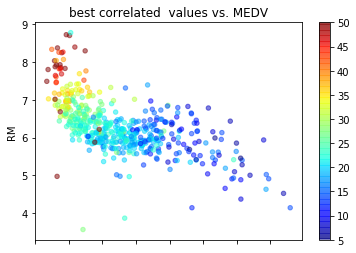

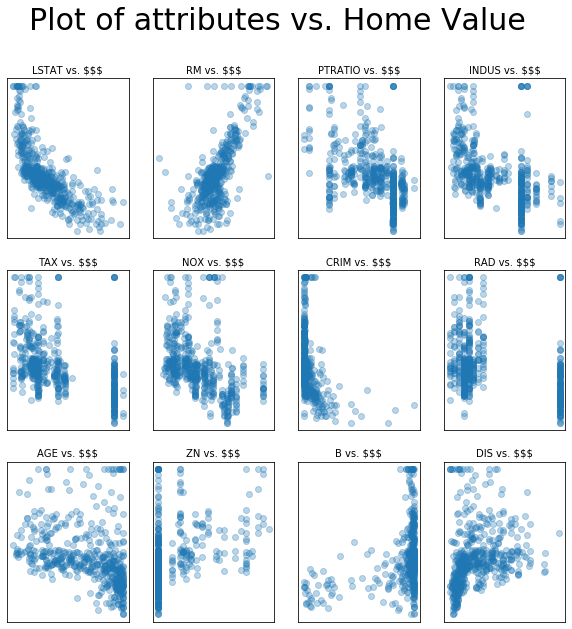

In [111]:
import matplotlib.pyplot as plt

data = pd.read_csv("housing.csv",sep="\s+")
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

corrs = data.corr()["MEDV"].apply(abs)
corrs = corrs.sort_values(ascending = False)[1:]#drops the "MEDV", the y
#data.plot(x = corrs.index[0], y = corrs.index[1], kind = "scatter", alpha = 0.5,
#         c = data["MEDV"], cmap = plt.get_cmap("jet"), title = "best correlated  values vs. MEDV")

fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (10,10))
fig.title = "asdf"
rw_loc = 0
col_loc = 0 
for i in corrs[:-1].index:#eleven factors
    #print(rw_loc, col_loc)
    #print(ax[rw_loc, col_loc].plot(list(range(10)), list(range(10))))
    fign = ax[rw_loc, col_loc] 
    fign.scatter(data[i], data["MEDV"], alpha = 0.3)
    fign.axes.get_xaxis().set_visible(False)
    fign.axes.get_yaxis().set_visible(False)
    fign.frame_on = False
    fign.set_title(i+ " vs. $$$", fontsize = 10)
    col_loc += 1
    col_loc %= 4
    if col_loc == 0:
        rw_loc += 1
        
fig.suptitle('Plot of attributes vs. Home Value', fontsize=30)
#see how being along the chase river changes the price distribution? Graphically

In [83]:
print(data.shape)


(505, 14)
